# AIM

NOTE: I am getting number of layers from fig 2a of https://arxiv.org/pdf/2111.06414.pdf

### Part 1
This notebook just generates the ECD parameters (the angles for conditional displacement and qubit rotations). It assumes that we can enact conditional displacement gates and qubit rotation gates. What we need though are the angles through which we can prepare distance fock states in the cavity

### Part 2
Given the param in part 1, in this part we test them by doing unitary time evolution of ECD gates

### 1. Part 1

In [1]:
import sys 
sys.path.append('C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram')
sys.path.append('C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram\\ECD_control')


In [2]:
# from ECD_control import ECD_optimization
# from ECD_control import ECD_pulse_construction

import numpy as np
import qutip as qt 
from ECD_new_batch_optimizer import BatchOptimizer
from ECD_control.ECD_optimization.optimization_analysis import OptimizationAnalysis, OptimizationSweepsAnalysis
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


Need tf version 2.3.0 or later. Using tensorflow version: 2.7.0


Need tf version 2.3.0 or later. Using tensorflow version: 2.7.0



[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2472753035907651989
 xla_global_id: -1]

In [3]:
#The target oscillator state.
N =10
Fock = 1
psi_t = qt.basis(N,Fock) #target state

In [4]:
psi_t

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [9]:
#Optimization of ECD Circuit parameters (betas, phis, and thetas)
#the optimization options
opt_params = {
'N_blocks' : 5, #circuit depth
'N_multistart' : 10, #Batch size (number of circuit optimizations to run in parallel)
'epochs' : 10, #number of epochs before termination
'epoch_size' : 10, #number of adam steps per epoch
'learning_rate' : 0.01, #adam learning rate
'term_fid' : 0.995, #terminal fidelitiy
'dfid_stop' : 1e-6, #stop if dfid between two epochs is smaller than this number
'beta_scale' : 3.0, #maximum |beta| for random initialization
'initial_states' : [qt.tensor(qt.basis(2,0),qt.basis(N,0))], #qubit tensor oscillator, start in |g> |0>
'target_states' : [qt.tensor(qt.basis(2,0), psi_t)], #end in |e> |target>.
'name' : 'Fock %d' % Fock, #name for printing and saving
'filename' : None, #if no filename specified, results will be saved in this folder under 'name.h5'
}


#note: optimizer includes pi pulse in every ECD step. However, final ECD step is implemented 
#in experiment as a displacement since the qubit and oscillator should be disentangled at this point.
#So, we ask the optimizer to end in |e> |target> instead of |g>|target>.

#### Filename for angles to be stored

In [10]:
fname = 'ECD_Angles_Fock1Of10_4ECD_1.txt'

In [11]:
#create optimization object. 
#initial params will be randomized upon creation
opt = BatchOptimizer(**opt_params)

#print optimization info. 
opt.print_info()

None
Tensor("alphas:0", shape=(1, 10), dtype=complex64)
Tensor("alphas:0", shape=(5, 10), dtype=complex64)
optimization_type: state transfer
N_multistart: 10
N_blocks: 5
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 10
beta_scale: 3.0
alpha_scale: 1.0
theta_scale: 3.141592653589793
use_displacements: False
use_phase: False
name: Fock 1
comment: 
user_angles: None
N_cav: 10
filename: Fock 1.h5

Best circuit parameters found:
betas:         [-1.71904+0.48448j -0.10092+0.1854j  -0.37916+0.47545j -0.4049 -0.99482j
 -0.72554+1.1183j ]
alphas:        [0.+0.j]
phis (deg):    [  0.      -64.1888   98.94164 -53.654   -52.71885]
thetas (deg):  [  33.65786 -104.06996 -173.16281   62.67304  127.14568]
Max Fidelity:  0.325772




In [12]:
#run optimizer.
opt.optimize()

Start time: 2023-01-09 09:32:09
 Epoch: 10 / 10 Max Fid: 0.959608 Avg Fid: 0.769028 Max dFid: 0.118701 Avg dFid: 0.039498 Elapsed time: 0:00:02.825858 Remaing time: 0:00:00296089

Optimization stopped.  Reached maximum number of epochs. Terminal fidelity not reached.

optimization_type: state transfer
N_multistart: 10
N_blocks: 5
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 10
beta_scale: 3.0
alpha_scale: 1.0
theta_scale: 3.141592653589793
use_displacements: False
use_phase: False
name: Fock 1
comment: 
user_angles: None
N_cav: 10
filename: Fock 1.h5

Best circuit parameters found:
betas:         [-0.0819 +1.38953j -0.90528-0.20076j  0.22805-0.93536j  0.45169+0.49579j
 -0.28912-1.24856j]
alphas:        [0.+0.j]
phis (deg):    [   0.        78.81258 -167.73816 -119.90143   30.93991]
thetas (deg):  [-111.77259   71.88417   74.53956   72.00206 -136.79631]
Max Fidelity:  0.961030


termination reason: epochs
optimization timestamp (start time

'2023-01-09 09:32:09'

In [13]:
#can print info, including the best circuit found.
opt.print_info() 

optimization_type: state transfer
N_multistart: 10
N_blocks: 5
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 10
beta_scale: 3.0
alpha_scale: 1.0
theta_scale: 3.141592653589793
use_displacements: False
use_phase: False
name: Fock 1
comment: 
user_angles: None
N_cav: 10
filename: Fock 1.h5

Best circuit parameters found:
betas:         [-0.0819 +1.38953j -0.90528-0.20076j  0.22805-0.93536j  0.45169+0.49579j
 -0.28912-1.24856j]
alphas:        [0.+0.j]
phis (deg):    [   0.        78.81258 -167.73816 -119.90143   30.93991]
thetas (deg):  [-111.77259   71.88417   74.53956   72.00206 -136.79631]
Max Fidelity:  0.961030




### Saving angles: My way (without using h5 files, just the standard txt)

In [14]:
#
betas = opt.best_circuit()['betas']
phis = opt.best_circuit()['phis']
thetas = opt.best_circuit()['thetas']

params = [np.real(betas), np.imag(betas), phis, thetas]
for i in range(len(params)):
    params[i] = [float(k) for k in params[i]]

a_file = open(fname, "w")
np.savetxt(a_file, params)
a_file.close()

In [15]:
#Analysis of the results. Can load the .h5 file.
#all data is stored as a timestamp in a .h5 file
#You can also specify which timestamp you are analyzing. Be defult, it will use the most recent optimization in the file.
#I  recommend using "HDFview" software to understand data structure
#filename = opt.filename
# filename = 'Fock %d.h5' % Fock
# analysis = OptimizationAnalysis(filename)
# analysis.print_info() #we can print info of best circuit

In [16]:
#We can plot the fidelities of the different parallel optimizations
#analysis.plot_fidelities()

In [17]:
#We can also load the best circuit, states, and other parameters (see OptimizationAnalysis class)
# best_circuit = analysis.best_circuit()
# print(best_circuit)
# target_state = analysis.target_state()
# print(target_state)

In [18]:
#there are a few other things we can plot.
# analysis.plot_mag_betas()
# analysis.plot_average_magnitude_beta()

### 2. Part 2

##### Getting the Drive

In [19]:
from Simplified_ECD_pulse_construction import *

In [20]:
# Import Data 
import numpy as np
b_file = open(fname, "r")
params = np.loadtxt(b_file)
print(params)

[[-0.0818993  -0.90527844  0.22805111  0.45169237 -0.28912395]
 [ 1.38952804 -0.20075801 -0.93536335  0.49578887 -1.24856365]
 [ 0.          1.37553906 -2.92758298 -2.09267473  0.5400033 ]
 [-1.9507997   1.25461555  1.30096078  1.2566731  -2.38754606]]


In [21]:
import cmath
betas = np.asarray([complex(params[0][i], params[1][i]) for i in range(len(params[0]))])
phis = params[2]
thetas = params[3]

#the parameters in our circuit. Can be user defined, or loaded from the result of an ECD optimization.

print('betas:' + str(betas))
print('phis:' + str(phis))
print('thetas:' + str(thetas))

betas:[-0.0818993 +1.38952804j -0.90527844-0.20075801j  0.22805111-0.93536335j
  0.45169237+0.49578887j -0.28912395-1.24856365j]
phis:[ 0.          1.37553906 -2.92758298 -2.09267473  0.5400033 ]
thetas:[-1.9507997   1.25461555  1.30096078  1.2566731  -2.38754606]


In [31]:
#a= 10
#Our cavity and qubit. When using pulse construction on the FPGA, these objects can be loaded, and 
#Here, we are making a "FakeCavity" and a "FakeQubit" with parameters found from experimental calibrations.

storage_params = {
        "chi_kHz": -33, #dispersive shift
        "chi_prime_Hz": 0, #second order dispersive shift
        "Ks_Hz": 0, #Kerr correction not yet implemented.
        "epsilon_m_MHz": 400, #largest oscillator drive amplitude in MHz (max|epsilon|)
        "unit_amp": 0.01, #DAC unit amp of gaussian displacement to alpha=1.
        "sigma": 11, #oscillator displacement sigma
        "chop": 4, #oscillator displacement chop (number of stds. to include in gaussian pulse)
    }
qubit_params = {'unit_amp': 0.5, 'sigma': 6, 'chop': 4} #parameters for qubit pi pulse.

#calculating conversion between qubit DAC units and MHz (Omega)
pi = rotate(np.pi, phi=0, sigma=qubit_params['sigma'], chop=qubit_params['chop'], dt=1)
Omega_m = np.real(np.max(pi))/qubit_params['unit_amp']

#creating the "Fake storage" and "Fake qubit"
storage = FakeStorage(**storage_params)
qubit = FakeQubit(**qubit_params)

#The maximum displacement used during the ECD gates.
alpha_CD = 30
#Small delay to insert between oscillator and qubit pulses
buffer_time = 4

In [32]:
np.max(pi)

(0.127133144839528+0j)

In [33]:
#From these calibrations, the storage and qubit objects calculate the
#conversion between DAC amplitude, and drive amplitude in MHz.
#so, [Omega(t) in MHz] = [Omega(t) in DAC units]*Omega_m_MHz 
#and [Omega(t) in MHz] = [Omega(t) in DAC units]*Omega_m_MHz.
#These parameters also represent the maximum drive amplitude,
#since the DAC max amplitude is 1 (assuming amplifiers don't saturate.)
print('Maximum oscillator drive amplitude: |epsilon|/2*pi < %.3f MHz' % storage.epsilon_m_MHz)
print('Maximum qubit drive amplitude: |Omega|/2*pi < %.3f MHz' % qubit.Omega_m_MHz)


Maximum oscillator drive amplitude: |epsilon|/2*pi < 690.790 MHz
Maximum qubit drive amplitude: |Omega|/2*pi < 40.468 MHz


In [34]:
#generating the conditional displacement circuit.
#set 'chi_prime_correction = True' to correct for linear part of chi'
#final_disp = True will implement final ECD gate as a displacement
pulse_dict = conditional_displacement_circuit(betas, phis, thetas, storage, qubit,
                     alpha_CD,buffer_time=buffer_time, kerr_correction = False, chi_prime_correction=True, final_disp=True, pad=True)
cavity_dac_pulse, qubit_dac_pulse, = pulse_dict['cavity_dac_pulse'], pulse_dict['qubit_dac_pulse']



Modified method: Cond Disp Circuit
Modified conditional displacement called
---------------------------
Final Displacement: 1.3919395312055882
Modified conditional displacement called


C:\Users\Eesh Gupta\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


---------------------------
Final Displacement: 0.9272717187186356
Modified conditional displacement called
---------------------------
Final Displacement: 0.9627626447356772
Modified conditional displacement called
---------------------------
Final Displacement: 0.670695612978276
Modified conditional displacement called
---------------------------
Final Displacement: 1.2810222399168487


In [35]:
cavity_dac_pulse_GHz = (2*np.pi)*(10**(-3))*storage.epsilon_m_MHz*cavity_dac_pulse #convert from DAC to Mhz to Ghz
qubit_dac_pulse_GHz = (2*np.pi)*10**(-3)*qubit.Omega_m_MHz*qubit_dac_pulse #convert from DAC to Mhz to Ghz

In [36]:
#max qubit drive amplitude
2*np.pi*qubit.Omega_m_MHz

254.266289679056

Text(0, 0.5, 'Ghz')

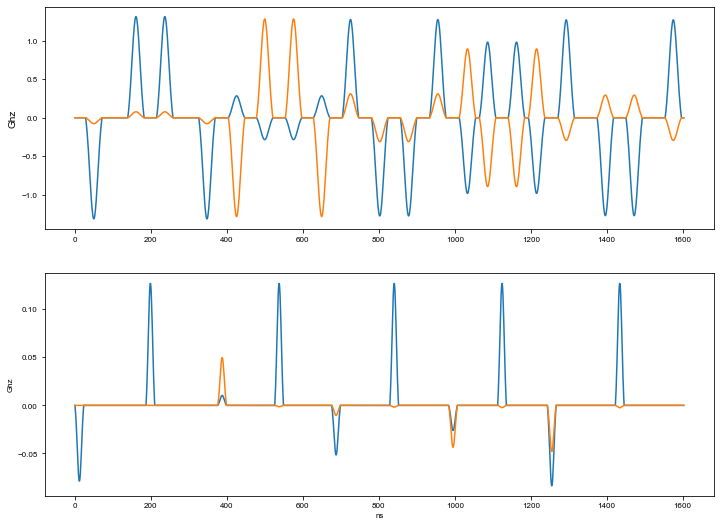

In [37]:
#plotting the pulse in GHz
fig, axs = plt.subplots(2,1)
axs[0].plot(np.real(cavity_dac_pulse_GHz))
axs[0].plot(np.imag(cavity_dac_pulse_GHz))
axs[0].set_ylabel('Ghz', fontsize = 10)
axs[1].plot(np.real(qubit_dac_pulse_GHz))
axs[1].plot(np.imag(qubit_dac_pulse_GHz))
plt.xlabel('ns')
plt.ylabel('Ghz')

In [38]:
max(qubit_dac_pulse_GHz)

(0.12657830880111806+0j)

In [41]:
np.abs(max(cavity_dac_pulse_GHz))

1.312952614168471

##### Finding alpha(t)

In [42]:
def alpha_from_epsilon_nonlinear_finite_difference(
    epsilon_array, delta=0, alpha_init=0 + 0j):
    dt = 1
    alpha = np.zeros_like(epsilon_array)
    alpha[0] = alpha_init
    alpha[1] = alpha_init
    for j in range(1, len(epsilon_array) - 1):
        alpha[j + 1] = (
                2*
                 dt
                * (
                    -1j * delta# * alpha[j]
                    #- 2j * Ks * np.abs(alpha[j]) ** 2 * alpha[j]
                    #- (kappa / 2.0) * alpha[j]
                    - 1j * epsilon_array[j]
                )
                + alpha[j - 1])
    return alpha

In [43]:
def alpha_star_from_epsilon_nonlinear_finite_difference(
    epsilon_array, delta=0, alpha_init=0 + 0j):
    dt = 1
    alpha = np.zeros_like(epsilon_array)
    alpha[0] = alpha_init
    alpha[1] = alpha_init
    for j in range(1, len(epsilon_array) - 1):
        alpha[j + 1] = (
                2*
                 dt
                * (
                    1j * delta# * alpha[j]
                    #- 2j * Ks * np.abs(alpha[j]) ** 2 * alpha[j]
                    #- (kappa / 2.0) * alpha[j]
                    + 1j * epsilon_array[j]
                )
                + alpha[j - 1])
    return alpha

In [44]:
alpha = alpha_from_epsilon_nonlinear_finite_difference(
    epsilon_array =cavity_dac_pulse_GHz , delta=0, alpha_init=0 + 0j)
alpha_star = alpha_star_from_epsilon_nonlinear_finite_difference(
    epsilon_array =np.conjugate(cavity_dac_pulse_GHz) , delta=0, alpha_init=0 + 0j)

Text(0.5, 0, 'ns')

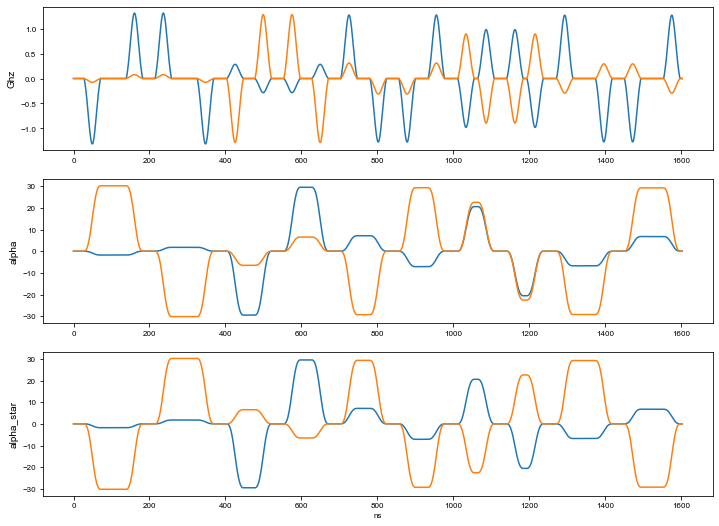

In [45]:
fig, axs = plt.subplots(3,1)
axs[0].plot(np.real(cavity_dac_pulse_GHz))
axs[0].plot(np.imag(cavity_dac_pulse_GHz))
axs[0].set_ylabel('Ghz', fontsize = 10)
axs[1].plot(np.real(alpha))
axs[1].plot(np.imag(alpha))
axs[1].set_ylabel('alpha', fontsize = 10)

axs[2].plot(np.real(alpha_star))
axs[2].plot(np.imag(alpha_star))
axs[2].set_ylabel('alpha_star', fontsize = 10)
plt.xlabel('ns')

In [75]:
np.abs(max(alpha))

63.03334660789033

##### Qutip Simulation

In [69]:
from qutip import *
from qutip.control import *
from math import *

In [70]:
T = len(cavity_dac_pulse)
times = np.linspace(0, T, T) #1ns timesteps

###### Qutip: System Hammy

In [71]:
n_c = 10  #number of levels in cavity
n_q = 2 #number of levels in qubit

#N = 1 #target cavity state

omega_c  = 5.26 *2*pi   #frequencies in GHz
omega_q = 6.65*2*pi
#K = -3.7*(10**(-6))*2*pi #cavity nonlinearity

#photon depenedent number shifts
chi = storage_params["chi_kHz"]*2*pi*(10**(-6)) #linear
chi_ = storage_params["chi_prime_Hz"]*(10**(-9)) #quadratic

##mode to mode coupling 
eta = 10**(-9)

In [72]:
# Creating identity, annhilitation/creation, num operators 
identity_q = qeye(n_q)
identity_c = qeye(n_c)

a_q = destroy(n_q)
a_c = destroy(n_c)

adag_q = create(n_q)
adag_c = create(n_c)

num_q = num(n_q)
num_c =  num(n_c)


c_ops = []

tlist = times




In [73]:
# Displace Frame hammy
H0_disp = tensor(identity_q,identity_c)#(chi/2)*tensor(sigmaz(),num_c)

In [74]:
# prepping time depedent hammys
alpha_sq =np.real( [np.real(i)**2 + np.imag(i)**2 for i in alpha])
H = [
#     H0_disp,
    [tensor(a_q, qeye(n_c)), np.conjugate(qubit_dac_pulse_GHz)], 
     [tensor(adag_q, qeye(n_c)), qubit_dac_pulse_GHz],
#         [a_q, qubit_imag], #convert from DAC to MHz to Ghz
#      [adag_q, qubit_real],
     [(chi/2)*tensor(sigmaz(), destroy(n_c)), alpha_star],
     [(chi/2)*tensor(sigmaz(), create(n_c)), alpha],
     #[(chi/2)*tensor(sigmaz(), qeye(n_c)), alpha_sq]
     ]

In [75]:
max(chi/2*alpha_star)

(0.002920116810839464+0.0011269109871536757j)

In [76]:
max(qubit_dac_pulse_GHz)

(0.12657830880111806+0j)

In [77]:
chi/(2*np.pi)

-3.2999999999999996e-05

###### Qutip: Simulation

In [78]:
states_filename = 'State_store_g0_g1'

In [79]:
psi0 = tensor(basis(n_q,0), basis(n_c,0))
opts = Options(store_states=True, store_final_state=True, nsteps = 5000)
output = mesolve(H, psi0 , times, c_ops, [], options =opts)
qsave(output.states, states_filename)
rho = output.states[-1]

In [80]:
rho

Quantum object: dims = [[2, 10], [1, 1]], shape = (20, 1), type = ket
Qobj data =
[[ 0.01459979+0.00454907j]
 [-0.13856325-0.98779337j]
 [ 0.00109713-0.00120401j]
 [-0.00601733+0.00289301j]
 [-0.01933737+0.020726j  ]
 [ 0.00165768+0.00684323j]
 [-0.00965904+0.00200788j]
 [-0.01484908+0.01575775j]
 [-0.0052864 +0.00416248j]
 [-0.00210493+0.00556937j]
 [ 0.00037703+0.00887077j]
 [ 0.00431521-0.01208998j]
 [-0.00804169-0.00555012j]
 [-0.03354229-0.01314133j]
 [ 0.00240176+0.02649384j]
 [ 0.01491786-0.02007807j]
 [ 0.0093599 +0.00249474j]
 [ 0.00863419-0.0093794j ]
 [ 0.00125894-0.00565432j]
 [ 0.00118846+0.0046803j ]]

In [81]:
target_state = tensor(basis(n_q,0), basis(n_c, 1))
fidelity = rho.overlap(target_state)
#print('Fidelity is '+ str(fidelity*fidelity.imag))

In [82]:
fidelity*np.conjugate(fidelity)

(0.9949355259951791+0j)

In [42]:
opt.best_fidelity()

0.54295385

In [45]:
import pylab as plot
params = {'legend.fontsize': 15,
          'legend.handlelength': 2}
plot.rcParams.update(params)

In [46]:
def plot_populations_single_mode(output_states, figname, title):
    '''
    Given output of mesolve, outputs populations with qubit as ground
    '''
    fig, axs = plt.subplots(2,1, figsize=(10,8))
    probs = []
    times = [k/1000 for k in range(len(output_states))]
    max_num_levels = 10 # to be shown on the plot
    
    #qubit grounded
    for i in range(max_num_levels):
        target = tensor(basis(n_q,0), basis(n_c, i))
        pops = []
        for k in range(len(output_states)): 
            z = target.overlap(output_states[k])
            pops.append(z.real**2 + z.imag**2)
        axs[0].plot(times, pops, label = '|g,'+str(i)+'>')
    
    #qubit excited
    for i in range(max_num_levels):
        target = tensor(basis(n_q,1), basis(n_c, i))
        pops = []
        for k in range(len(output_states)): 
            z = target.overlap(output_states[k])
            pops.append(z.real**2 + z.imag**2)
        axs[1].plot(times, pops, linestyle = '--',  label = '|e,'+str(i) +'>')

    axs[1].set_xlabel(r"Time ($\mu$s)", fontsize = 18)
    axs[1].set_ylabel("Populations", fontsize = 18)
    axs[0].set_ylabel("Populations", fontsize = 18)
    axs[0].tick_params(axis = 'both', which = 'major', labelsize = '15')
    axs[0].tick_params(axis = 'both', which = 'minor', labelsize = '15')
    axs[1].tick_params(axis = 'both', which = 'major', labelsize = '15')
    axs[1].tick_params(axis = 'both', which = 'minor', labelsize = '15')
#     axs[0].set_xticks(fontsize= 10)
#     axs[1].set_yticks(fontsize= 10)
#     axs[0].set_yticks(fontsize= 10)
#     plt.legend(prop={'size': 20},  fontsize = 8, loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)   
    axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = '15')
    axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = '15')
    #plt.legend(fontsize = '15')
    #fig.suptitle(title, fontsize = 15)
    plt.tight_layout()
    fig.savefig(figname, dpi = 1000)

Loaded list object.


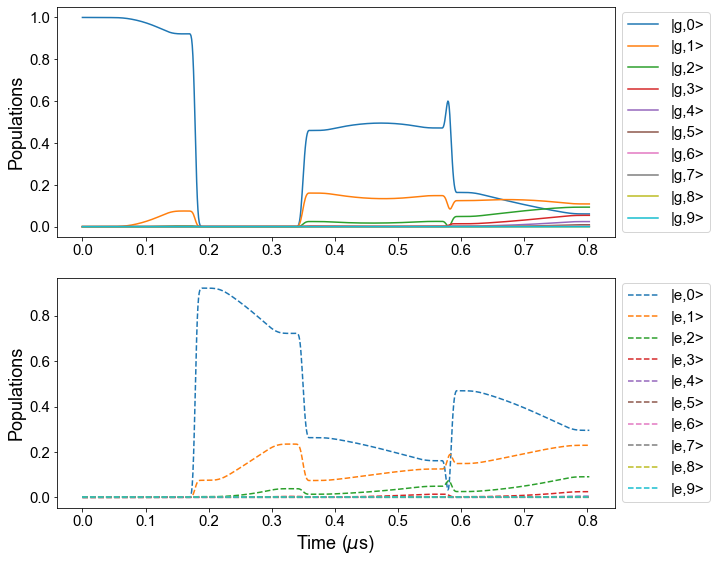

In [47]:
figname = "g0_g1"
data = qload(states_filename)
plot_populations_single_mode(data, figname, None)

# Dump

In [102]:
def plot_populations(output, figname):
    '''
    Given output of mesolve, outputs populations with qubit as ground
    '''
    fig = plt.figure(figsize=(10,8))
    probs = []
    times = [k for k in range(len(output.states))]
    max_num_levels = 3 # to be shown on the plot
    
    #qubit grounded
    for i in range(max_num_levels):
        for j in range(max_num_levels):
            target = tensor(basis(n_q,0), basis(n_c, i), basis(n_c, j))
            pops = []
            for k in range(len(output.states)): 
                z = target.overlap(output.states[k])
                pops.append(z.real**2 + z.imag**2)
            plt.plot(times, pops, label = '|g,'+str(i)+',' + str(j)+'>')
    
    #qubit excited
    for i in range(max_num_levels):
        for j in range(max_num_levels):
            target = tensor(basis(n_q,1), basis(n_c, i), basis(n_c, j))
            pops = []
            for k in range(len(output.states)): 
                z = target.overlap(output.states[k])
                pops.append(z.real**2 + z.imag**2)
            plt.plot(times, pops, label = '|e,'+str(i)+',' + str(j)+'>')
            
    plt.xlabel("Time (ns)", fontsize = 14)
    plt.ylabel("Populations", fontsize = 14)
    plt.xticks(fontsize= 10)
    plt.yticks(fontsize= 10)
#     plt.legend(prop={'size': 20},  fontsize = 8, loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)   
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.legend()
    fig.savefig(figname, dpi = 1000)

In [92]:

plot_populations(output, 'g00 to g01_eta1Hz.png')

TypeError: incompatible lengths 200 and 20

<Figure size 720x576 with 0 Axes>

# g01-> g11

In [70]:
def get_hammy(eta): 
    '''
    get hamiltonian for system with specified eta
    '''
    
    # Displace Frame hammy
    H0_disp = ((chi/2)*tensor(sigmaz(), num_c, identity_c) # first mode -qubit
            +
          (chi/2)*tensor(sigmaz(), identity_c, num_c) # 2nd mode - qubit
           +
          (eta)*tensor(identity_q, num_c, num_c)) # MODE-MODE
    
    # prepping time depedent hammys
    alpha_sq =np.real( [np.real(i)**2 + np.imag(i)**2 for i in alpha])
    
    H = [H0_disp,
         #Qubit drive
        [tensor(a_q, identity_c, identity_c), np.conjugate(qubit_dac_pulse_GHz)], 
         [tensor(adag_q, identity_c, identity_c), qubit_dac_pulse_GHz],

         # Desired Displacement term from qubit-mode coupling
         [(chi/2)*tensor(sigmaz(), a_c, identity_c), alpha_star],  
         [(chi/2)*tensor(sigmaz(), adag_c, identity_c), alpha],

         # UnDesired Displacement term from mode-mode coupling
         [(eta)*tensor(identity_q, a_c, num_c), alpha_star],  
         [(eta)*tensor(identity_q, adag_c, num_c), alpha],

         # Undesired alpha^2 terms
          [(chi/2)*tensor(sigmaz(), identity_c, identity_c), alpha_sq],
         [(eta)*tensor(identity_q, identity_c, num_c), alpha_sq]
         ]
    return H

In [78]:
psi0_new = tensor(basis(n_q,0), basis(n_c,0), basis(n_c,1))
opts = Options(store_states=True, store_final_state=True, nsteps = 5000)
output2 = mesolve(H, psi0_new , times, c_ops, [], options =opts)
rho2 = output2.states[-1]

In [79]:
target_state2 = tensor(basis(n_q,0), basis(n_c, 1), basis(n_c, 1))
fidelity = rho2.overlap(target_state2)
print('Fidelity is '+ str(fidelity))

Fidelity is (0.98889596104917-0.03804891443889872j)


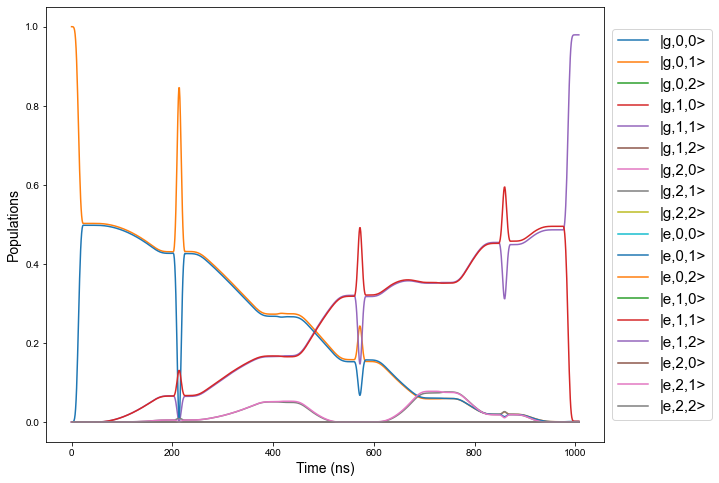

In [82]:
plot_populations(output2, 'g01 to g11_eta1Hz.png')

# Turning chi of second mode off

In [86]:
def get_hammy(eta, chi_2): 
    '''
    get hamiltonian for system with specified eta
    '''
    
    # Displace Frame hammy
    H0_disp = ((chi/2)*tensor(sigmaz(), num_c, identity_c) # first mode -qubit
            +
          (chi_2/2)*tensor(sigmaz(), identity_c, num_c) # 2nd mode - qubit
           +
          (eta)*tensor(identity_q, num_c, num_c)) # MODE-MODE
    
    # prepping time depedent hammys
    alpha_sq =np.real( [np.real(i)**2 + np.imag(i)**2 for i in alpha])
    
    H = [H0_disp,
         #Qubit drive
        [tensor(a_q, identity_c, identity_c), np.conjugate(qubit_dac_pulse_GHz)], 
         [tensor(adag_q, identity_c, identity_c), qubit_dac_pulse_GHz],

         # Desired Displacement term from qubit-mode coupling
         [(chi/2)*tensor(sigmaz(), a_c, identity_c), alpha_star],  
         [(chi/2)*tensor(sigmaz(), adag_c, identity_c), alpha],

         # UnDesired Displacement term from mode-mode coupling
         [(eta)*tensor(identity_q, a_c, num_c), alpha_star],  
         [(eta)*tensor(identity_q, adag_c, num_c), alpha],

         # Undesired alpha^2 terms
          [(chi/2)*tensor(sigmaz(), identity_c, identity_c), alpha_sq],
         [(eta)*tensor(identity_q, identity_c, num_c), alpha_sq]
         ]
    return H

In [87]:
def get_fidelity(eta, chi_2):
    """
    With specified eta, we return the overlap between final state after unitary 
    dynamics and the target state
    """
    H = get_hammy(eta, chi_2)
    psi0 = tensor(basis(n_q,0), basis(n_c,0), basis(n_c,1))
    opts = Options(store_states=True, store_final_state=True, nsteps = 5000)
    output = mesolve(H, psi0 , times, c_ops, [], options =opts)
    rho = output.states[-1]
    
    target_state = tensor(basis(n_q,0), basis(n_c, 1), basis(n_c, 1))
    fidelity = np.absolute(rho.overlap(target_state))
    print('Eta is ' + str(eta) + ' and fidelity is ' + str(fidelity))
    print(rho.overlap(target_state))
    
    return fidelity 

In [90]:
etas = [i*(10**-9) for i in range(10)] #Hz in GHz units
chis = [i*2*pi*(10**-6) for i in range(10)] #kHz in GHz units 

fids = []
for chi in chis: 
    for eta in etas: 
        fids.append(get_fidelity(eta, chi))
        print(fids[-1])

Eta is 0.0 and fidelity is 0.0
0j
0.0
Eta is 1e-09 and fidelity is 1.1073563282116465e-09
(1.0911156528136339e-09+1.8895679351496526e-10j)
1.1073563282116465e-09
Eta is 2e-09 and fidelity is 1.8977223717671493e-09
(-1.504943830511127e-09+1.1560684526930189e-09j)
1.8977223717671493e-09
Eta is 3.0000000000000004e-09 and fidelity is 1.2952469273122654e-09
(1.2715434086499461e-09+2.466616359119129e-10j)
1.2952469273122654e-09
Eta is 4e-09 and fidelity is 1.1610719385024937e-09
(1.1475008734338014e-09-1.7700223684067108e-10j)
1.1610719385024937e-09
Eta is 5e-09 and fidelity is 2.2105125816879537e-10
(1.979522382930261e-10-9.837972399223545e-11j)
2.2105125816879537e-10
Eta is 6.000000000000001e-09 and fidelity is 1.3219089619857868e-09
(1.8724568167507506e-10-1.3085802835410509e-09j)
1.3219089619857868e-09
Eta is 7.000000000000001e-09 and fidelity is 5.687939446462081e-10
(1.74810904394292e-10+5.412649066501941e-10j)
5.687939446462081e-10
Eta is 8e-09 and fidelity is 1.3727149280652003e-09
(

Eta is 7.000000000000001e-09 and fidelity is 0.04682434044342084
(-0.04680377556253615+0.0013876062312919884j)
0.04682434044342084
Eta is 8e-09 and fidelity is 0.04682434044147916
(-0.0468043526229674+0.00136800340806055j)
0.04682434044147916
Eta is 9.000000000000001e-09 and fidelity is 0.04682434017822097
(-0.04680492121191753+0.0013484003381604112j)
0.04682434017822097
Eta is 0.0 and fidelity is 0.05462012097861762
(-0.054590931917963735+0.0017854321737530692j)
0.05462012097861762
Eta is 1e-09 and fidelity is 0.05462012111407323
(-0.05459167498539808+0.0017625699432050619j)
0.05462012111407323
Eta is 2e-09 and fidelity is 0.05462012096316852
(-0.05459240819118594+0.0017397074231305064j)
0.05462012096316852
Eta is 3.0000000000000004e-09 and fidelity is 0.05462012083057266
(-0.054593131839502596+0.0017168446350923432j)
0.05462012083057266
Eta is 4e-09 and fidelity is 0.054620120711633836
(-0.05459384592544698+0.0016939815884500526j)
0.054620120711633836
Eta is 5e-09 and fidelity is 0.0

Eta is 0 and fidelity is 0.0702029989624121
(-0.07016468848424363+0.002318955201267111j)
Eta is 0 and fidelity is 0.0701995984506399
(-0.07016157201579223+0.0023102889221663565j)
Eta is 0 and fidelity is 0.07019748154753154
(-0.07015972022215482+0.002302188950757811j)
Eta is 0 and fidelity is 0.07019884372427067
(-0.07016134858469338+0.0022940847852074044j)
Eta is 0 and fidelity is 0.07019840980281707
(-0.07016118075492199+0.002285925177998331j)
Eta is 0 and fidelity is 0.07019833977503274
(-0.07016137233239357+0.0022778805074416477j)
Eta is 0 and fidelity is 0.07019831280225519
(-0.0701616105991633+0.0022696956656436396j)
Eta is 0 and fidelity is 0.07019824824869035
(-0.07016180978067507+0.002261527246160297j)
Eta is 0 and fidelity is 0.07019835068327994
(-0.07016218022347864+0.00225319882408358j)
Eta is 0 and fidelity is 0.07019822217346025
(-0.0701623143341483+0.002245004140454019j)


Text(0, 0.5, 'Fidelity')

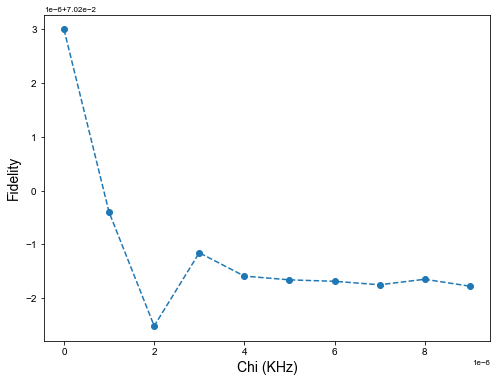

In [91]:
chis = [i*2*pi*(10**-6) for i in range(10)] #kHz in GHz units 
fids = [get_fidelity(0,chi_2) for chi_2 in chis]

fig = plt.figure(figsize=(8,6))
plt.plot([eta*(10**3) for eta in etas], fids, linestyle = '--', marker = 'o')

plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
plt.xlabel("Chi (KHz)", fontsize = 14)
plt.ylabel("Fidelity", fontsize = 14)

Eta is 1e-09 and fidelity is 0.07020299883353365
(-0.07016565323570417+0.0022895744644021326j)
Eta is 1e-09 and fidelity is 0.07019820602898935
(-0.07016348583503551+0.0022075744982237465j)
Eta is 1e-09 and fidelity is 0.07019805252532667
(-0.0701658656983991+0.0021255279679983693j)
Eta is 1e-09 and fidelity is 0.07019787681155758
(-0.07016813389399733+0.002043255902885598j)
Eta is 1e-09 and fidelity is 0.07019767901109755
(-0.07017028963565794+0.0019607628599507434j)
Eta is 1e-09 and fidelity is 0.07019745813449293
(-0.07017233116122865+0.0018780489724036578j)
Eta is 1e-09 and fidelity is 0.07019724744599683
(-0.07017429104501934+0.0017951115072403054j)
Eta is 1e-09 and fidelity is 0.07019697970568259
(-0.07017610134939878+0.0017119460268723873j)
Eta is 1e-09 and fidelity is 0.07019668726281163
(-0.07017779356106714+0.0016285556709010993j)
Eta is 1e-09 and fidelity is 0.07019646969870216
(-0.07017946666310533+0.0015449326985013453j)


Text(0, 0.5, 'Fidelity')

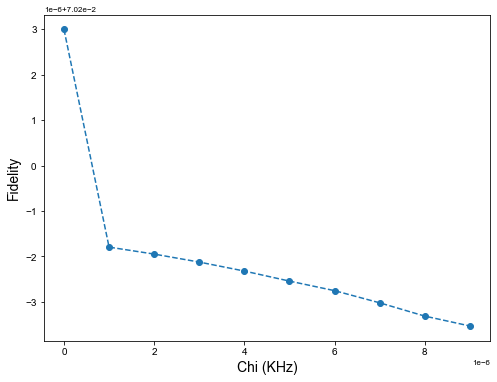

In [93]:
chis = [i*10*2*pi*(10**-6) for i in range(10)] #kHz in GHz units 
fids = [get_fidelity(10**-9,chi_2) for chi_2 in chis]

fig = plt.figure(figsize=(8,6))
plt.plot([eta*(10**3) for eta in etas], fids, linestyle = '--', marker = 'o')

plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
plt.xlabel("Chi (KHz)", fontsize = 14)
plt.ylabel("Fidelity", fontsize = 14)

In [94]:
chi

9e-06

In [95]:
chis[0]

0.0